# **`Manufacturing Production & Quality Analysis`**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **LOADING DATA**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving manufacturing_dataset.csv to manufacturing_dataset.csv


In [4]:
df=pd.read_csv("manufacturing_dataset.csv")
df


,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295
...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Chemicals,1879,53,3.42,244,183943,151717,172024
496,2025-05-11,PLANT_B,P008,Electronics,1572,63,5.78,108,55668,294472,389780
497,2025-05-11,PLANT_B,P001,Automotive,989,93,4.10,60,117391,275458,305835
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628


In [5]:
#first 5rows
df.head()

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295


In [6]:
#last 5rows
df.tail()

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
495,2025-05-07,PLANT_B,P001,Chemicals,1879,53,3.42,244,183943,151717,172024
496,2025-05-11,PLANT_B,P008,Electronics,1572,63,5.78,108,55668,294472,389780
497,2025-05-11,PLANT_B,P001,Automotive,989,93,4.10,60,117391,275458,305835
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628
499,2025-05-14,PLANT_A,P002,Chemicals,1104,107,2.36,130,80109,132101,218226


In [7]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   500 non-null    object 
 1   Plant_ID               500 non-null    object 
 2   Product_ID             500 non-null    object 
 3   Product_Category       500 non-null    object 
 4   Units_Produced         500 non-null    int64  
 5   Units_Defective        500 non-null    int64  
 6   Machine_Downtime(hrs)  500 non-null    float64
 7   Labor_Hours            500 non-null    int64  
 8   Material_Cost(INR)     500 non-null    int64  
 9   Production_Cost(INR)   500 non-null    int64  
 10  Revenue(INR)           500 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 43.1+ KB


In [8]:
#total no.of rows and columns
df.shape

(500, 11)

In [9]:
#statistical data
df.describe()

,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,1271.396000,77.038000,4.020880,171.376000,126149.956000,253905.34400,338847.510000
std,429.002617,45.899347,2.288555,72.396029,43803.353473,87574.67671,96871.111637
min,501.000000,1.000000,0.010000,50.000000,50174.000000,100192.00000,137528.000000
25%,895.500000,35.000000,2.200000,104.750000,87256.250000,179750.50000,259166.250000
50%,1300.000000,78.000000,4.045000,173.000000,126790.500000,254240.50000,340217.000000
75%,1641.250000,118.000000,5.995000,235.000000,161713.250000,332713.50000,418230.000000
max,1996.000000,149.000000,7.960000,299.000000,199865.000000,399372.00000,538353.000000


In [10]:
df.columns

Index(['Date', 'Plant_ID', 'Product_ID', 'Product_Category', 'Units_Produced',
       'Units_Defective', 'Machine_Downtime(hrs)', 'Labor_Hours',
       'Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
Date,0
Plant_ID,0
Product_ID,0
Product_Category,0
Units_Produced,0
Units_Defective,0
Machine_Downtime(hrs),0
Labor_Hours,0
Material_Cost(INR),0
Production_Cost(INR),0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df["Defect Rate(%)"]=df["Units_Defective"]/df["Units_Produced"]*100
df

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR),Defect Rate(%)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407,1.908200
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221,16.293532
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157,13.498920
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059,7.586207
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295,5.454545
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Chemicals,1879,53,3.42,244,183943,151717,172024,2.820649
496,2025-05-11,PLANT_B,P008,Electronics,1572,63,5.78,108,55668,294472,389780,4.007634
497,2025-05-11,PLANT_B,P001,Automotive,989,93,4.10,60,117391,275458,305835,9.403438
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628,2.542373


In [15]:
df["Profit(INR)"]=df["Revenue(INR)"]-df["Production_Cost(INR)"]
df

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR),Defect Rate(%),Profit(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407,1.908200,90453
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221,16.293532,81602
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157,13.498920,149572
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059,7.586207,82653
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295,5.454545,96777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Chemicals,1879,53,3.42,244,183943,151717,172024,2.820649,20307
496,2025-05-11,PLANT_B,P008,Electronics,1572,63,5.78,108,55668,294472,389780,4.007634,95308
497,2025-05-11,PLANT_B,P001,Automotive,989,93,4.10,60,117391,275458,305835,9.403438,30377
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628,2.542373,99866


In [16]:
df['Defect Rate(%)'] = df['Defect Rate(%)'].replace([np.inf, -np.inf], np.nan)

In [17]:
df.head()

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR),Defect Rate(%),Profit(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407,1.908200,90453
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221,16.293532,81602
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157,13.498920,149572
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059,7.586207,82653
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295,5.454545,96777


# Exploratory Data Analysis(EDA)

<Figure size 1200x600 with 0 Axes>

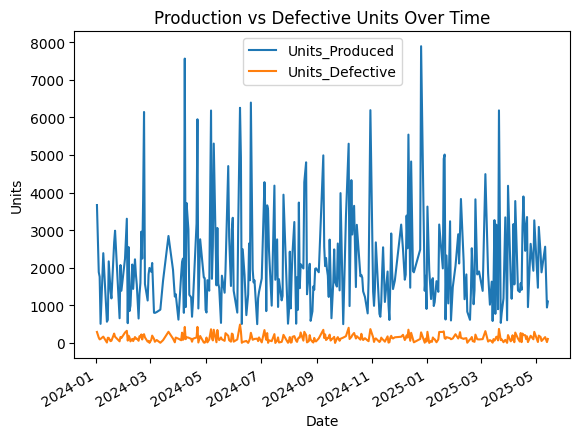

In [18]:
# 1. Trend of production vs. defective units over time
plt.figure(figsize=(12, 6))
df.groupby('Date')[['Units_Produced', 'Units_Defective']].sum().plot()
plt.title('Production vs Defective Units Over Time')
plt.ylabel('Units')
plt.show()

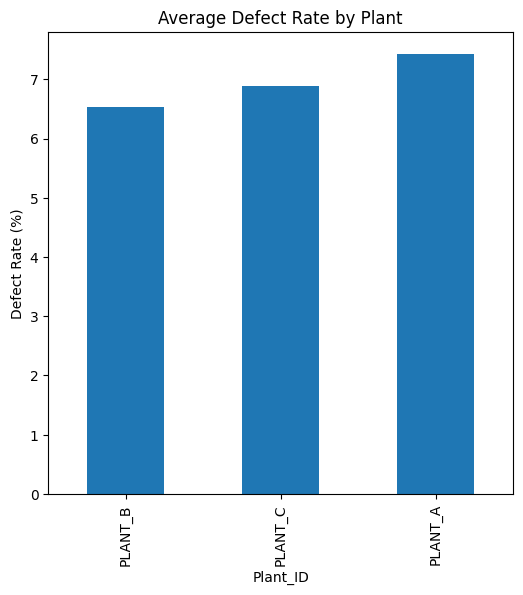

In [28]:
# 2. Compare defect rates across plants and product categories
plt.figure(figsize=(6, 6))
df.groupby('Plant_ID')['Defect Rate(%)'].mean().sort_values().plot(kind='bar')
plt.title('Average Defect Rate by Plant')
plt.ylabel('Defect Rate (%)')
plt.show()

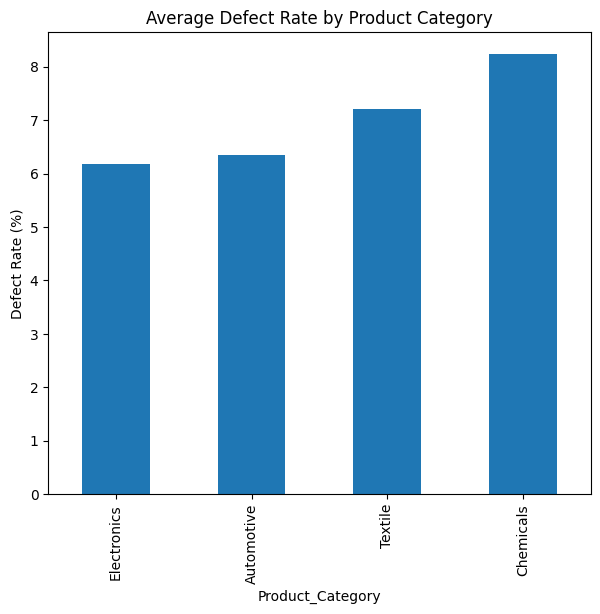

In [27]:
plt.figure(figsize=(7, 6))
df.groupby('Product_Category')['Defect Rate(%)'].mean().sort_values().plot(kind='bar')
plt.title('Average Defect Rate by Product Category')
plt.ylabel('Defect Rate (%)')
plt.show()

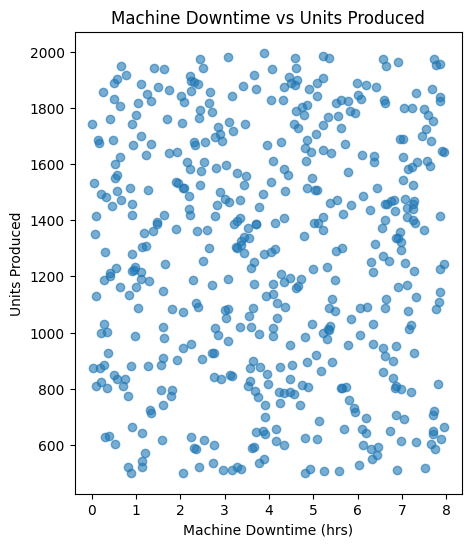

In [26]:
# 3. Relationship between machine downtime and units produced
plt.figure(figsize=(5, 6))
plt.scatter(df['Machine_Downtime(hrs)'], df['Units_Produced'], alpha=0.6)
plt.title('Machine Downtime vs Units Produced')
plt.xlabel('Machine Downtime (hrs)')
plt.ylabel('Units Produced')
plt.show()

In [29]:
# Calculate correlation
correlation = df['Machine_Downtime(hrs)'].corr(df['Units_Produced'])
print(f"Correlation between Machine Downtime and Units Produced: {correlation:.3f}")

Correlation between Machine Downtime and Units Produced: -0.002


In [30]:
# 4. Top 5 most profitable products
top_products = df.groupby('Product_ID')['Profit(INR)'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Profitable Products:")
print(top_products)

Top 5 Most Profitable Products:
Product_ID
P008    2893515
P019    2888354
P005    2766962
P006    2560868
P017    2553667
Name: Profit(INR), dtype: int64


/tmp/ipython-input-2534970769.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit.values, palette='viridis')


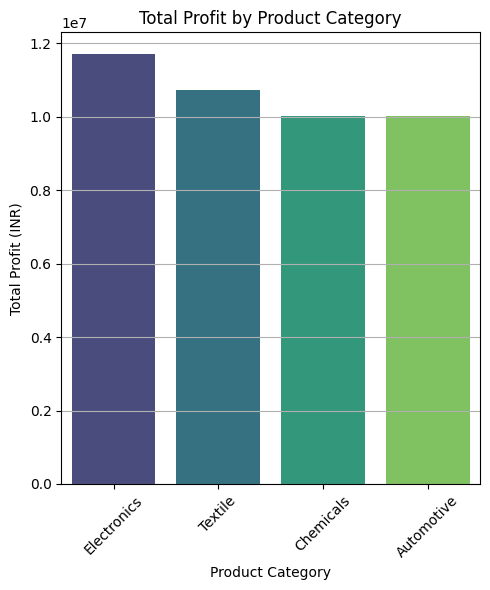

In [33]:
category_profit = df.groupby('Product_Category')['Profit(INR)'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x=category_profit.index, y=category_profit.values, palette='viridis')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

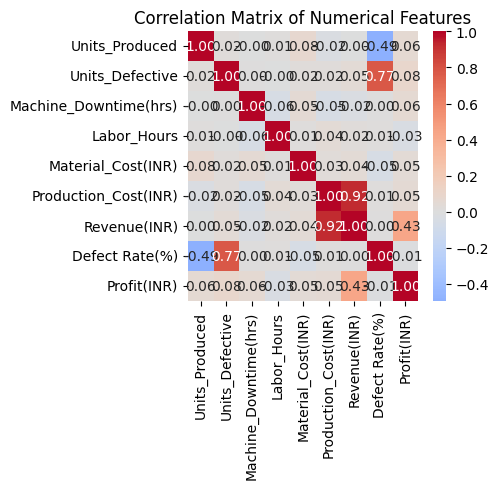

In [38]:
# Select relevant numerical columns
numerical_cols = [
    'Units_Produced', 'Units_Defective', 'Machine_Downtime(hrs)', 'Labor_Hours',
    'Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)',
    'Defect Rate(%)', 'Profit(INR)'
]

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [42]:
# Which plant has the highest defect rate?
plant_defect_rates = df.groupby('Plant_ID')['Defect Rate(%)'].mean().sort_values(ascending=False)
highest_defect_plant = plant_defect_rates.idxmax()
print(f"Plant with highest defect rate: {highest_defect_plant} ({plant_defect_rates.max():.2f}%)")

Plant with highest defect rate: PLANT_A (7.43%)


In [43]:
# Which product line is the most profitable?
category_profit = df.groupby('Product_Category')['Profit(INR)'].sum()
most_profitable_category = category_profit.idxmax()
print(f"Most profitable product category: {most_profitable_category} (₹{category_profit.max():,.2f})")

Most profitable product category: Electronics (₹11,709,476.00)


In [44]:
# Does higher machine downtime significantly affect production?
downtime_corr = df['Machine_Downtime(hrs)'].corr(df['Units_Produced'])
print(f"Correlation between machine downtime and production: {downtime_corr:.3f}")

if abs(downtime_corr) > 0.3:
    print("There is a significant relationship between machine downtime and production.")
else:
    print("Machine downtime does not have a strong linear relationship with production volume.")

Correlation between machine downtime and production: -0.002
Machine downtime does not have a strong linear relationship with production volume.


In [45]:
# Additional insights
print("\nAdditional Insights:")
print(f"Overall defect rate: {df['Defect Rate(%)'].mean():.2f}%")
print(f"Total profit across all operations: ₹{df['Profit(INR)'].sum():,.2f}")
print(f"Most common product category: {df['Product_Category'].mode()[0]}")


Additional Insights:
Overall defect rate: 6.97%
Total profit across all operations: ₹42,471,083.00
Most common product category: Electronics


i